In [1]:
import pickle
import analysis_config
from online_analysis import util_fcns

in task
in task
in task


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
################################################
#### From 5/21/20  -- Single trial dynamics; ###
################################################

#### Load models #####
animal = 'grom'
model_set_number = 7; 
#dat_cond = pickle.load(open(analysis_config.config[animal+'_pref'] + 'tuning_models_'+animal+'_model_set%d_cond_spec.pkl' %(model_set_number), 'rb'))
dat = pickle.load(open(analysis_config.config[animal+'_pref'] + 'tuning_models_'+animal+'_model_set%d_task_spec_pls_gen.pkl' %(model_set_number), 'rb'))

##### For day, get decoder trials ####
day = 0; 
if animal == 'grom':
    F, K = util_fcns.get_grom_decoder(day)
    

dyn_model = 'hist_1pos_0psh_0spksm_1_spksp_0'
model_type = 2; # General model 

spks = dat[day, 'spks']
pred_spks = dat[day, dyn_model][:, :, model_type]
trg = dat[day, 'trg']
tsk = dat[day, 'task']
pos = dat[day, 'pos']
vel = dat[day, 'vel']
trl = dat[day, 'trl']

AttributeError: 'module' object has no attribute 'get_jeev_decoder'

In [ ]:
#### Parse up into trials ####
trl_dat = {}

for i_t in range(2):
    tsk_ix = np.nonzero(tsk == i_t)[0]
    
    for i in np.unique(trl[tsk_ix]):
        trl_ix = np.nonzero(trl[tsk_ix] == i)[0]
        ix_tsk_trl = tsk_ix[trl_ix]
        
        trl_dat[i_t, i] = dict(trg=trg[ix_tsk_trl[0]], tsk = tsk[ix_tsk_trl[0]], pos = pos[ix_tsk_trl, :], 
                          vel = vel[ix_tsk_trl, :], spks = spks[ix_tsk_trl, :], pred_spks = pred_spks[ix_tsk_trl, :])

In [ ]:
#### Note about grom day 0; 
#### Target 0, 1, 2, 7 not well predicted by dynamics; 
#### Targets 5, 6, are well predicted; 
#### Nice to specify target and index; 
target = 3; 
task = 1; 
trl_index = 3;  


trl_num = get_trl_num(target, task, trl_index, trl, trg, tsk)
plot_trial(trl_dat[task, trl_num], F, K)#, xlim =[-1., 5.], ylim=[-7., -4.])

In [3]:
################################################################
#### From 5/26/20  -- Single trial dynamics w/ past / future ###
################################################################
#### Load models #####
animal = 'grom'
dat = pickle.load(open(analysis_config.config[animal+'_pref'] + 'tuning_models_%s_model_set%d_task_spec_pls_gen.pkl' %(animal, 10), 'rb'))

##### For day, get decoder trials ####
day = 0; 
F, K = util_fcns.get_grom_decoder(day)
dyn_model = 'hist_1pos_0psh_0spksm_1_spksp_0'
fut_model = 'hist_1pos_0psh_0spksm_0_spksp_1'
bth_model = 'hist_1pos_0psh_0spksm_1_spksp_1'

model_type = 2; # General model 

spks = dat[day, 'spks']

pred_spks_past = dat[day, dyn_model][:, :, model_type]
pred_spks_fut = dat[day, fut_model][:, :, model_type]
pred_spks_bth = dat[day, bth_model][:, :, model_type]

trg = dat[day, 'trg']
tsk = dat[day, 'task']
pos = dat[day, 'pos']
vel = dat[day, 'vel']
trl = dat[day, 'trl']

IOError: [Errno 2] No such file or directory: '/Users/preeyakhanna/Dropbox/TimeMachineBackups/grom2016/tuning_models_grom_model_set10_task_spec_pls_gen.pkl'

Import Error in db.namelist: from tasklist import tasks -- likely error in a single task preventing import
error importing BMI configuration variables


Traceback (most recent call last):
  File "/Users/preeyakhanna/bmi3d/db/namelist.py", line 92, in <module>
    from bmilist import *
  File "/Users/preeyakhanna/bmi3d/config_files/bmilist.py", line 25, in <module>
    from ismore.ismore_bmi_lib import StateSpaceArmAssist, StateSpaceReHand, StateSpaceIsMore
ImportError: No module named ismore.ismore_bmi_lib
online_analysis/generate_models_utils.py:112: DeprecationWarning: openFile() is pending deprecation, use open_file() instead. You may use the pt2to3 tool to update your source code.
  hdf = tables.openFile(pref+hdf[hdfix:])



(64,) (64,) (18, 44) 6 (18,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (18, 44) 6 (18,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(64,) (64,) (18, 44) 6 (18,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 64, total trls in this blk 64
(101,) (101,) (40, 44) 6 (40,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(101,) (101,) (40, 44) 6 (40,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(101,) (101,) (40, 44) 6 (40,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 165, total trls in this blk 101
(122,) (122,) (97, 44) 6 (97,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(122,) (122,) (97, 44) 6 (97,)
[0. 1. 2. 3. 4. 5. 6. 7.]
(122,) (122,) (97, 44) 6 (97,)
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 287, total trls in this blk 122


<IPython.core.display.Javascript object>


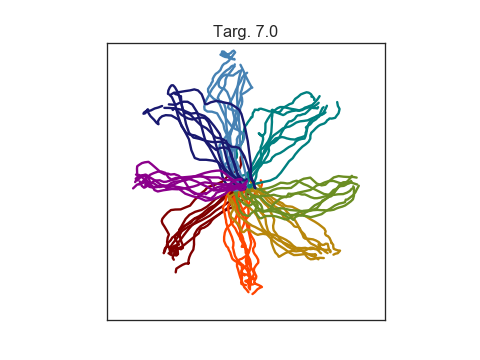

<IPython.core.display.Javascript object>


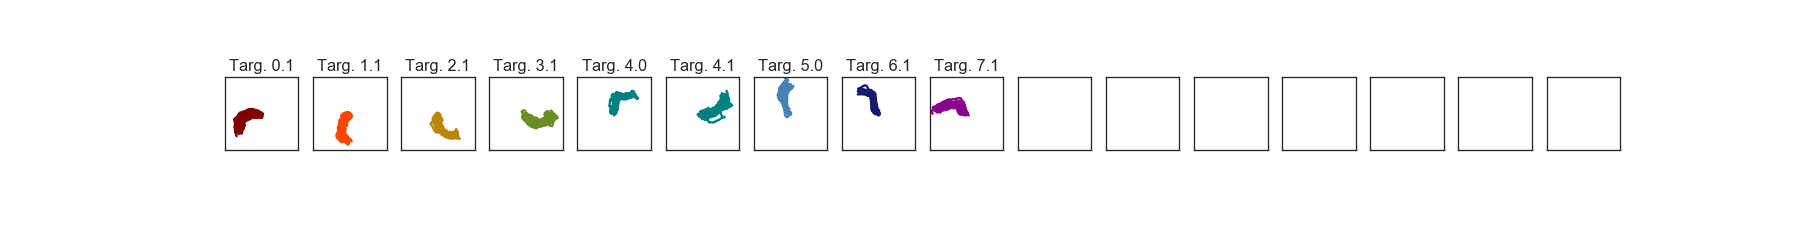

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)



Animal grom, tsk 0, N = 2357
Tsk 0, Trg 0.00, N = 274
Tsk 0, Trg 1.00, N = 353
Tsk 0, Trg 2.00, N = 335
Tsk 0, Trg 3.00, N = 337
Tsk 0, Trg 4.00, N = 324
Tsk 0, Trg 5.00, N = 287
Tsk 0, Trg 6.00, N = 205
Tsk 0, Trg 7.00, N = 242
Animal grom, tsk 1, N = 9614
Tsk 1, Trg 0.10, N = 1084
Tsk 1, Trg 1.10, N = 1123
Tsk 1, Trg 2.10, N = 1301
Tsk 1, Trg 3.10, N = 1527
Tsk 1, Trg 4.00, N = 572
Tsk 1, Trg 4.10, N = 1320
Tsk 1, Trg 5.00, N = 1046
Tsk 1, Trg 6.10, N = 753
Tsk 1, Trg 7.10, N = 888


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-10-17 09:21:48.728841. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [6]:
import analysis_config
from online_analysis import generate_models_utils
data, data_temp, sub_spk0_temp_all, sub_spk_temp_all, sub_push_all = generate_models_utils.get_spike_kinematics('grom', 
                     analysis_config.data_params['grom_input_type'][0], 
                     analysis_config.data_params['grom_ordered_input_type'][0], 
                     0, full_shuffle = False, 
                     within_bin_shuffle = False, shuffix = None, nshuffs = 1, day_ix = 0)


In [ ]:
#### Confirm that p_t = p_{t-1} + delta*v_t

In [8]:
pos = data['pos']
vel = data['vel']

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-10-17 09:22:42.709294. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [23]:
pos[1, :]

array([-0.33694862,  2.27200813])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-10-17 09:25:22.912112. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [25]:
pos[0, :] + 0.07*vel[0, :] + F[[0, 2], -1]

array([-0.30840397,  2.34872937])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-10-17 09:25:54.273793. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [32]:
F, K = util_fcns.get_grom_decoder(0)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 7. 0. 0. 0.]
 [0. 0. 0. 0. 7. 0. 0.]
 [0. 0. 0. 0. 0. 7. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-10-17 10:08:31.600631. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [5]:
#### Parse up into trials ####
trl_dat = {}

for i_t in range(2):
    tsk_ix = np.nonzero(tsk == i_t)[0]
    
    for i in np.unique(trl[tsk_ix]):
        trl_ix = np.nonzero(trl[tsk_ix] == i)[0]
        ix_tsk_trl = tsk_ix[trl_ix]
        
        trl_dat[i_t, i] = dict(trg=trg[ix_tsk_trl[0]], tsk = tsk[ix_tsk_trl[0]], pos = pos[ix_tsk_trl, :], 
                          vel = vel[ix_tsk_trl, :], spks = spks[ix_tsk_trl, :], 
                          pred_spks_past = pred_spks_past[ix_tsk_trl, :], pred_spks_fut = pred_spks_fut[ix_tsk_trl, :],
                          pred_spks_bth = pred_spks_bth[ix_tsk_trl, :])

<IPython.core.display.Javascript object>


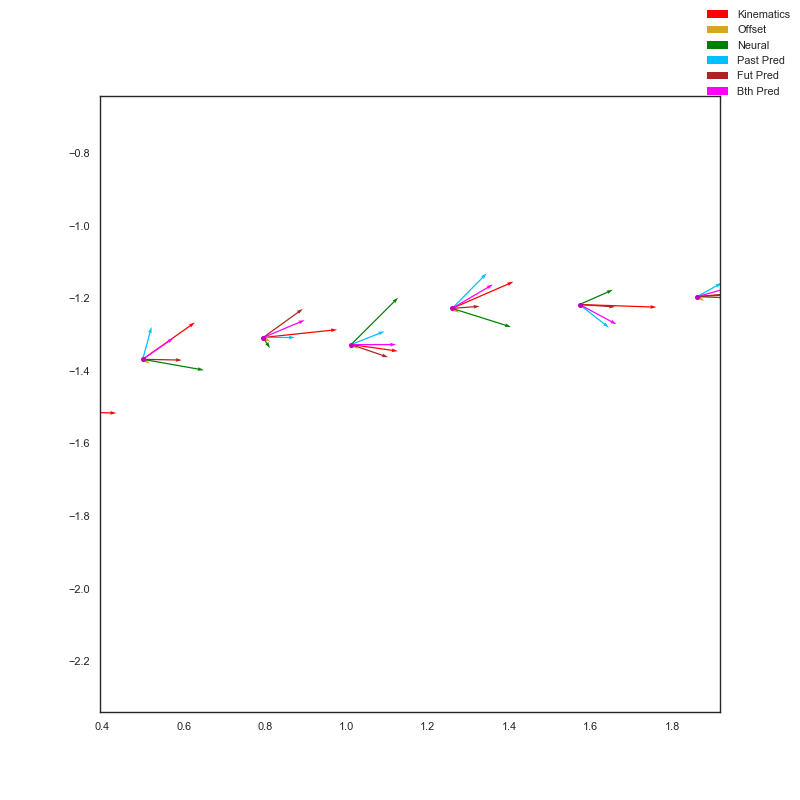

In [28]:
#### Note about grom day 0; 
#### Target 0, 1, 2, 7 not well predicted by dynamics; 
#### Targets 5, 6, are well predicted; 
#### Nice to specify target and index; 
target = 3; 
task = 0; 
trl_index = 1;  

trl_num = get_trl_num(target, task, trl_index, trl, trg, tsk)
plot_trial_multi_pred(trl_dat[task, trl_num], F, K)#, xlim =[3, 9], ylim=[-.6, .6])#, ylim=[-7., -4.])

In [152]:
def plot_trial(trl_data_i, F, K, arrow_scale = 0.002, xlim = None, ylim = None):
    f, ax = plt.subplots(figsize=(10, 10))
    
    ### For each time point plot the position
    pos_tm1 = trl_data_i['pos'][:-1, :]
    int_vel_tm1 = np.dot(F[np.ix_([0, 2], [3, 5])], trl_data_i['vel'][:-1, :].T).T
    
    ### spks_t 
    Kpos = K[[0, 2], :]
    spks_t = trl_data_i['spks'][1:, :]
    pred_spks_t = trl_data_i['pred_spks'][1:, :]
    
    kg_pos = np.dot(Kpos, spks_t.T).T
    kg_pred_pos = np.dot(Kpos, pred_spks_t.T).T
    
    ### offset; 
    pos_offset = F[[0, 2], -1]
    
    
    ### Plot each point; 
    tm1 = pos_tm1.shape[0]
    
    ### plot position; 
    ax.plot(pos_tm1[:, 0], pos_tm1[:, 1], 'm.')
    

    ### Velocity / Kinematics ###
    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], int_vel_tm1[:, 0], int_vel_tm1[:, 1], 
             width=arrow_scale, color='r', angles='xy', scale=1, scale_units='xy', 
              label = 'Kinematics')

    ### Offset ###

    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], pos_offset[0], pos_offset[1], 
             width=arrow_scale, color = 'goldenrod', angles='xy', scale=1, scale_units='xy', 
              label = 'Offset')

    ### True Neural ###
    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], kg_pos[:, 0], kg_pos[:, 1], 
             width=arrow_scale, color = 'g', angles='xy', scale=1, scale_units='xy',
             label = 'Neural')
    
    ### Dynamics Neural ###
    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], kg_pred_pos[:, 0], kg_pred_pos[:, 1], 
             width=arrow_scale, color = 'deepskyblue', angles='xy', scale=1, scale_units='xy',
             label = 'Pred Neural')
    
    ### Sum ###
#     sum_arr = int_vel_tm1[:, :] + pos_offset[np.newaxis, :] + kg_pos[:, :]

#     ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], sum_arr[:, 0], sum_arr[:, 1], 
#              width=arrow_scale, color = 'k', angles='xy', scale=1, scale_units='xy',
#              label = 'Sum')    
        
    if xlim is None: 
        pass
    else:
        ax.set_xlim(xlim)
    if ylim is None:
        pass
    else:
        ax.set_ylim(ylim)
    f.legend()
        
    

In [11]:
def plot_trial_multi_pred(trl_data_i, F, K, arrow_scale = 0.002, xlim = None, ylim = None):
    f, ax = plt.subplots(figsize=(10, 10))
    
    ### For each time point plot the position
    pos_tm1 = trl_data_i['pos'][:-1, :]
    int_vel_tm1 = np.dot(F[np.ix_([0, 2], [3, 5])], trl_data_i['vel'][:-1, :].T).T
    
    ### spks_t 
    Kpos = K[[0, 2], :]
    spks_t = trl_data_i['spks'][1:, :]
    
    ## Get all predictions; 
    pred_spks_past_t= trl_data_i['pred_spks_past'][1:, :]
    pred_spks_fut_t = trl_data_i['pred_spks_fut'][1:, :]
    pred_spks_bth_t = trl_data_i['pred_spks_bth'][1:, :]
    
    kg_pos = np.dot(Kpos, spks_t.T).T
    
    ### Potent predictions; 
    kg_pred_pos_past = np.dot(Kpos, pred_spks_past_t.T).T
    kg_pred_pos_fut = np.dot(Kpos, pred_spks_fut_t.T).T
    kg_pred_pos_bth = np.dot(Kpos, pred_spks_bth_t.T).T
    
    ### offset; 
    pos_offset = F[[0, 2], -1]
    
    ### Plot each point; 
    tm1 = pos_tm1.shape[0]
    
    ### plot position; 
    ax.plot(pos_tm1[:, 0], pos_tm1[:, 1], 'm.')
    

    ### Velocity / Kinematics ###
    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], int_vel_tm1[:, 0], int_vel_tm1[:, 1], 
             width=arrow_scale, color='r', angles='xy', scale=1, scale_units='xy', 
              label = 'Kinematics')

    ### Offset ###

    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], pos_offset[0], pos_offset[1], 
             width=arrow_scale, color = 'goldenrod', angles='xy', scale=1, scale_units='xy', 
              label = 'Offset')

    ### True Neural ###
    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], kg_pos[:, 0], kg_pos[:, 1], 
             width=arrow_scale, color = 'g', angles='xy', scale=1, scale_units='xy',
             label = 'Neural')
    
    ### Dynamics Neural ###
    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], kg_pred_pos_past[:, 0], kg_pred_pos_past[:, 1], 
             width=arrow_scale, color = 'deepskyblue', angles='xy', scale=1, scale_units='xy',
             label = 'Past Pred')
    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], kg_pred_pos_fut[:, 0], kg_pred_pos_fut[:, 1], 
             width=arrow_scale, color = 'firebrick', angles='xy', scale=1, scale_units='xy',
             label = 'Fut Pred')
    ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], kg_pred_pos_bth[:, 0], kg_pred_pos_bth[:, 1], 
             width=arrow_scale, color = 'magenta', angles='xy', scale=1, scale_units='xy',
             label = 'Bth Pred')
    
    ### Sum ###
#     sum_arr = int_vel_tm1[:, :] + pos_offset[np.newaxis, :] + kg_pos[:, :]

#     ax.quiver(pos_tm1[:, 0], pos_tm1[:, 1], sum_arr[:, 0], sum_arr[:, 1], 
#              width=arrow_scale, color = 'k', angles='xy', scale=1, scale_units='xy',
#              label = 'Sum')    
        
    if xlim is None: 
        pass
    else:
        ax.set_xlim(xlim)
    if ylim is None:
        pass
    else:
        ax.set_ylim(ylim)
    f.legend()

In [8]:
def get_trl_num(target, task, trl_index, trl, trg, tsk):
    
    ### Get the correct trial number; 
    ix = np.nonzero(np.logical_and(trg == target, tsk == task))[0]
    trials = np.unique(trl[ix])
    
    if len(trials) <= trl_index:
        return trials[-1]
    else:
        return trials[trl_index]